In [1]:
import csv
import random
import math
import operator
import numpy as np
import pandas as pd
import nltk
import re

from pandas import DataFrame

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vcm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
dframe1 = pd.read_csv("2010.csv")
dframe2 = pd.read_csv("2012.csv")
dframe = pd.concat([dframe1, dframe2])
train = dframe
test = pd.read_csv("2014.csv")


In [4]:
dframe

,Unnamed: 0,LEA CODE,LEA,Total Teachers,Leaving,Attrition Rate,ADM,Reduced,Free,Needy Perc,...,Hawaiian Perc,Two or More Races Students,2 Plus perc,Total Revenue (TOTALREV) per Pupil (V33),Total Revenue - Federal Sources (TFEDREV) per Pupil (V33),Total Revenue - State Sources (TSTREV) per Pupil (V33),Total Revenue - Local Sources (TLOCREV) per Pupil (V33),Urban-centric Locale,Urban centric local number,groups
0,0,10,Alamance-Burlington,1508,172.0,11.41,22133,1295,10470,53.16,...,0.117472,0,0.000000,8659,1298,5016,2344,41-Rural: Fringe,41,2
1,1,20,Alexander,337,20.0,5.93,5450,476,2557,55.65,...,0.000000,668,12.256881,8504,1322,5576,1606,41-Rural: Fringe,41,2
2,2,30,Alleghany,132,8.0,6.06,1447,189,801,68.42,...,0.000000,144,9.951624,12048,1911,7128,3009,43-Rural: Remote,43,2
3,3,40,Anson,265,40.0,15.09,3755,2,2620,69.83,...,0.079893,13,0.346205,10384,2071,6607,1706,41-Rural: Fringe,41,3
4,4,50,Ashe,252,22.0,8.73,3145,327,1622,61.97,...,0.031797,11,0.349762,10873,1556,6471,2846,43-Rural: Remote,43,2
5,5,761,Asheboro City,338,34.0,10.06,4565,325,2927,71.24,...,0.043812,0,0.000000,9479,2303,5219,1957,32-Town: Distant,32,2
6,6,111,Asheville City,321,17.0,5.30,3855,182,1723,49.42,...,0.000000,197,5.110246,12957,2268,5533,5156,13-City: Small,13,1
7,7,60,Avery,196,19.0,9.69,2120,243,1073,62.08,...,0.188679,289,13.632075,11611,1661,6573,3377,42-Rural: Distant,42,2
8,8,70,Beaufort,512,59.0,11.52,6904,464,4064,65.59,...,0.000000,17,0.246234,9892,1653,5537,2702,42-Rural: Distant,42,2
9,9,80,Bertie,301,45.0,14.95,2730,226,1793,73.96,...,0.000000,241,8.827839,10744,2089,6941,1713,43-Rural: Remote,43,3


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#plt.scatter(dframe['S:T Ratio'], dframe['Attrition Rate'])

In [8]:
#myData=np.genfromtxt("concat.csv", delimiter=",", dtype ="|a20" ,skip_header=1);

#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#for i in range(37):
#    myData[:,i] = le.fit_transform(myData[:,i])
    

In [9]:
from sklearn.model_selection import train_test_split
#train, test = train_test_split(dframe, test_size = 0.3, random_state = 0)
#x = dframe.iloc[:, :-1].values
#y = dframe.iloc[:, 1].values

x_train = dframe[["Black Students", "Reduced", "Needy Perc"]]

x_test = test[[ "Black Students", "Reduced", "Needy Perc"]]

y_train = dframe.iloc[:, [38]]

y_test = test.iloc[:, [38]]



#x_train = train.drop('Attrition Rate', axis = 1)
#y_train = train['Attrition Rate']

#x_test = test.drop('Attrition Rate', axis =1)
#y_test = test['Attrition Rate']



In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)



/home/vcm/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/vcm/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse = []
for i in range(228):
    i = i +1
    model = neighbors.KNeighborsRegressor(n_neighbors = i)
    
    model.fit(x_train, y_train)
    pred_data = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred_data))
    rmse.append(error)
    
    print('RMSE value for i = ', i, 'is:', error)

RMSE value for i =  1 is: 1.304513083861144
RMSE value for i =  2 is: 1.1160708020048367
RMSE value for i =  3 is: 1.1226014066126297
RMSE value for i =  4 is: 1.1121340320587074
RMSE value for i =  5 is: 1.0799610129415247
RMSE value for i =  6 is: 1.0813634812390813
RMSE value for i =  7 is: 1.06912869283036
RMSE value for i =  8 is: 1.0708201070928702
RMSE value for i =  9 is: 1.073788360197263
RMSE value for i =  10 is: 1.0710709511774372
RMSE value for i =  11 is: 1.0737958616790642
RMSE value for i =  12 is: 1.0684994305746736
RMSE value for i =  13 is: 1.0652441724275687
RMSE value for i =  14 is: 1.0666350581603876
RMSE value for i =  15 is: 1.07614574692092
RMSE value for i =  16 is: 1.0748603795499747
RMSE value for i =  17 is: 1.0825514692069205
RMSE value for i =  18 is: 1.0750356991216454
RMSE value for i =  19 is: 1.0714953336739486
RMSE value for i =  20 is: 1.0655593210453684
RMSE value for i =  21 is: 1.0646167944961253
RMSE value for i =  22 is: 1.0668533257007702
RMS

RMSE value for i =  214 is: 1.0881801394359638
RMSE value for i =  215 is: 1.0881306681777725
RMSE value for i =  216 is: 1.0873227658955995
RMSE value for i =  217 is: 1.086189190500621
RMSE value for i =  218 is: 1.0844564819407057
RMSE value for i =  219 is: 1.0828190346301707
RMSE value for i =  220 is: 1.0833464939364112
RMSE value for i =  221 is: 1.0831575200236128
RMSE value for i =  222 is: 1.082499826398581
RMSE value for i =  223 is: 1.0827068595769815
RMSE value for i =  224 is: 1.083447285182998
RMSE value for i =  225 is: 1.0829036284788531
RMSE value for i =  226 is: 1.0841019263041807
RMSE value for i =  227 is: 1.083533917838569
RMSE value for i =  228 is: 1.0830758270559684


In [12]:
sumMSE = sum(rmse)
mean = sumMSE/228
mean

1.088463015778514

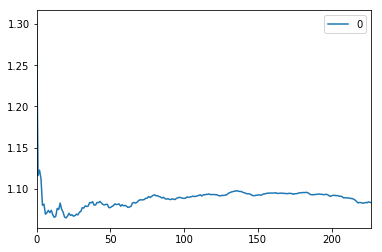

In [13]:
curve = pd.DataFrame(rmse) #elbow curve 
curve.plot()
    

In [14]:
from sklearn import metrics


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_test, y_test)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
    




0.631578947368421


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:

target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm.diagonal()

array([0.        , 0.53333333, 0.8627451 , 0.5       , 0.        ,
       0.        ])